In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/df_cleaned.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'LBXTC', 'RIAGENDR', 'RIDRETH3', 'RIDAGEYR', 'BMXWT',
       'BMXHT', 'BMXBMI', 'BPXPLS', 'BPXPULS', 'DR1TKCAL', 'DR1TPROT',
       'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT',
       'DR1TPFAT', 'DR1TCHOL', 'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON',
       'DR1TPOTA', 'DR1_300', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'BPQ020',
       'BPQ050A', 'BPQ080', 'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681', 'PAQ610',
       'PAD615', 'PAQ625', 'PAD630', 'PAQ655', 'PAD660', 'PAQ670', 'PAD675',
       'Systolic', 'Diastolic'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LBXTC      4644 non-null   float64
 1   RIAGENDR   4644 non-null   float64
 2   RIDRETH3   4644 non-null   float64
 3   RIDAGEYR   4644 non-null   float64
 4   BMXWT      4622 non-null   float64
 5   BMXHT      4619 non-null   float64
 6   BMXBMI     4614 non-null   float64
 7   BPXPLS     4567 non-null   float64
 8   BPXPULS    4568 non-null   float64
 9   DR1TKCAL   4644 non-null   float64
 10  DR1TPROT   4644 non-null   float64
 11  DR1TCARB   4644 non-null   float64
 12  DR1TSUGR   4644 non-null   float64
 13  DR1TFIBE   4644 non-null   float64
 14  DR1TTFAT   4644 non-null   float64
 15  DR1TSFAT   4644 non-null   float64
 16  DR1TMFAT   4644 non-null   float64
 17  DR1TPFAT   4644 non-null   float64
 18  DR1TCHOL   4644 non-null   float64
 19  DR1TSODI   4644 non-null   float64
 20  DR1TVD  

# Total Cholesterol

<AxesSubplot:>

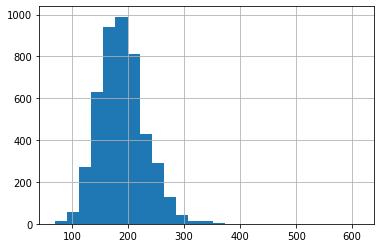

In [6]:
df.LBXTC.hist(bins=25)

Total cholesterol is right skewed with a mean of just less than 200.  There are some definite outliers.  Looking at the data when it is log transformed...

(array([  1.,   4.,   6.,   9.,  28.,  41., 125., 227., 389., 542., 681.,
        723., 762., 471., 337., 186.,  73.,  23.,  11.,   1.,   0.,   2.,
          0.,   1.,   1.]),
 array([4.2341065 , 4.32141154, 4.40871657, 4.4960216 , 4.58332663,
        4.67063166, 4.75793669, 4.84524172, 4.93254675, 5.01985178,
        5.10715682, 5.19446185, 5.28176688, 5.36907191, 5.45637694,
        5.54368197, 5.630987  , 5.71829203, 5.80559706, 5.8929021 ,
        5.98020713, 6.06751216, 6.15481719, 6.24212222, 6.32942725,
        6.41673228]),
 <BarContainer object of 25 artists>)

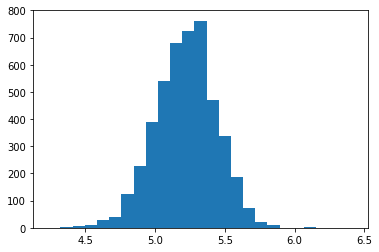

In [18]:
plt.hist(np.log(df.LBXTC),bins=25)

The distribution is now more symmetric.  I will have to decide if I want to log transform the dependant variable.

In [7]:
df.LBXTC.describe()

count    4644.000000
mean      189.389320
std        41.909269
min        69.000000
25%       160.000000
50%       186.000000
75%       213.000000
max       612.000000
Name: LBXTC, dtype: float64

# Demographics

## Gender

In [8]:
df.RIAGENDR.value_counts()

2.0    2374
1.0    2270
Name: RIAGENDR, dtype: int64

<AxesSubplot:xlabel='RIAGENDR', ylabel='LBXTC'>

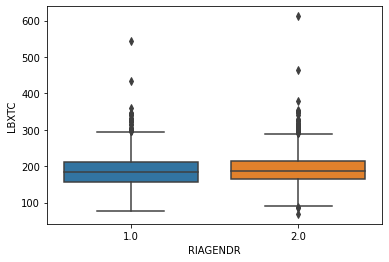

In [9]:
sns.boxplot(x='RIAGENDR',y='LBXTC',data=df)

Looking at gender and total cholesterol, the boxplot shows the medians and quartiles are relatively the same.  However femals, 2, have farther outliers than males.

## Race

In [10]:
df.RIDRETH3.value_counts()

3.0    1852
4.0     940
1.0     700
2.0     525
6.0     485
7.0     142
Name: RIDRETH3, dtype: int64

The value counts show the most are white while the least are of some other race.  Looking at total cholesterol and race...

<AxesSubplot:xlabel='RIDRETH3', ylabel='LBXTC'>

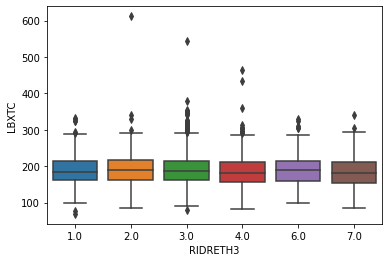

In [11]:
sns.boxplot(x='RIDRETH3',y='LBXTC',data=df)

Again boxplots appear similar, however 'other hispanics' have the highest outliers followed by whites and then blacks.

## Age

<AxesSubplot:>

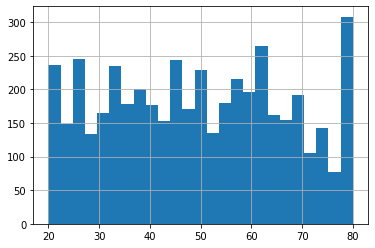

In [12]:
df.RIDAGEYR.hist(bins=25)

Various ages between 20 and 80.  Age was capped at 80 so anyone older was recorded as 80.  Looking at age and cholesterol level.

<AxesSubplot:xlabel='RIDAGEYR', ylabel='LBXTC'>

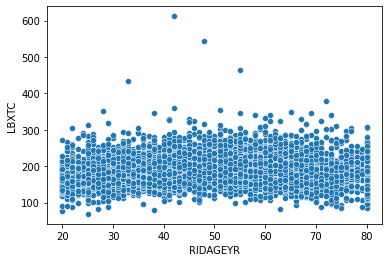

In [13]:
sns.scatterplot(x='RIDAGEYR',y='LBXTC',data=df)

From the scatterplot, it looks like the average for total cholesterol may increase around age 50.  Placing ages in bins and then using boxplots...

<AxesSubplot:xlabel='RIDAGEYR', ylabel='LBXTC'>

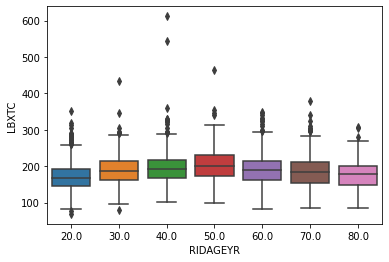

In [14]:
decade = np.floor(df['RIDAGEYR']/10)*10
sns.boxplot(x=decade,y=df.LBXTC)

As can be seen on the graph, the total cholesterol increases at age 50 then slightly decreases.  The reason for this may be that older adults are on medications to treat cholesterol.

## Body measures

## Weight

<AxesSubplot:>

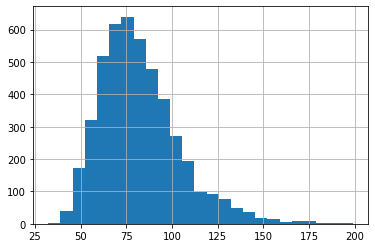

In [15]:
df.BMXWT.hist(bins=25)

Weight appears right skewed with a mean of around 75 kg.

In [16]:
df.BMXWT.describe()

count    4622.000000
mean       82.338468
std        22.090378
min        32.300000
25%        66.800000
50%        78.900000
75%        93.900000
max       198.900000
Name: BMXWT, dtype: float64

<AxesSubplot:xlabel='BMXWT', ylabel='LBXTC'>

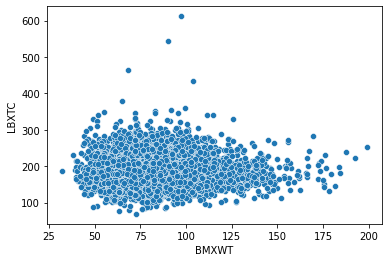

In [17]:
sns.scatterplot(x='BMXWT',y='LBXTC',data=df)

As can be seen when weight gets really large, total cholesterol increases.

## Height

<AxesSubplot:>

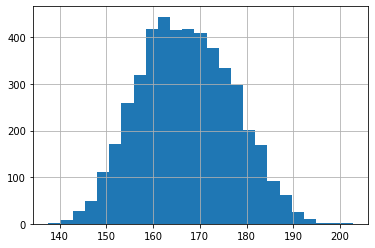

In [19]:
df.BMXHT.hist(bins=25)

In [20]:
df.BMXHT.describe()

count    4619.000000
mean      167.105270
std         9.987638
min       137.600000
25%       159.800000
50%       166.800000
75%       174.300000
max       202.700000
Name: BMXHT, dtype: float64

<AxesSubplot:xlabel='BMXHT', ylabel='LBXTC'>

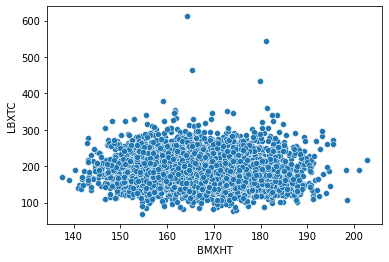

In [21]:
sns.scatterplot(x='BMXHT',y='LBXTC',data=df)

There doesn't seem to be much relation between height and total cholesterol

## BMI

<AxesSubplot:>

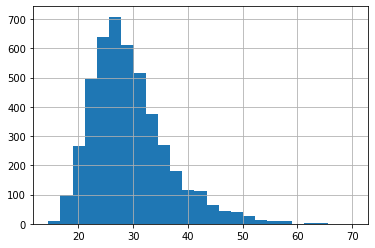

In [22]:
df.BMXBMI.hist(bins=25)

BMI is right skewed with a mean around 25

In [23]:
df.BMXBMI.describe()

count    4614.000000
mean       29.403836
std         7.168323
min        14.500000
25%        24.300000
50%        28.200000
75%        33.000000
max        70.100000
Name: BMXBMI, dtype: float64

<AxesSubplot:xlabel='BMXBMI', ylabel='LBXTC'>

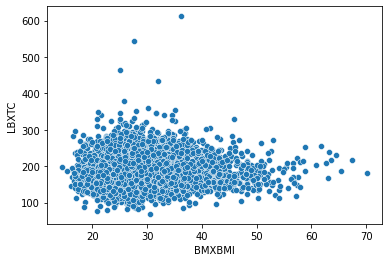

In [24]:
sns.scatterplot(x='BMXBMI',y='LBXTC',data=df)

Like with weight, as you see BMI increasing total cholesterol also increases.  Since BMI is calculated from height and weight I haven't decided if I just want to use bmi or if I want to use height and weight or maybe weight and bmi.

## Resting pulse

<AxesSubplot:>

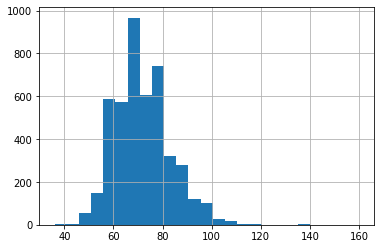

In [26]:
df.BPXPLS.hist(bins=25)

In [27]:
df.BPXPLS.describe()

count    4567.000000
mean       71.769652
std        11.593019
min        36.000000
25%        64.000000
50%        70.000000
75%        78.000000
max       160.000000
Name: BPXPLS, dtype: float64

<AxesSubplot:xlabel='BPXPLS', ylabel='LBXTC'>

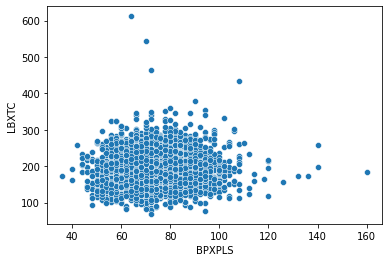

In [28]:
sns.scatterplot(x='BPXPLS',y='LBXTC',data=df)

It does appear as the pulse greatly increases, the total cholesterol increases.

## Irregular pulse

In [29]:
df.BPXPULS.value_counts()

1.0    4455
2.0     113
Name: BPXPULS, dtype: int64

More people are shown to have a regular pulse. 

<AxesSubplot:xlabel='BPXPULS', ylabel='LBXTC'>

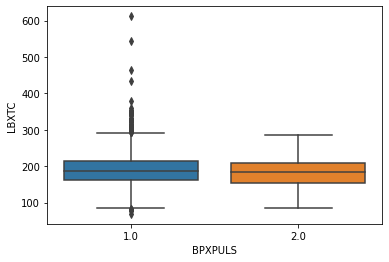

In [30]:
sns.boxplot(x='BPXPULS',y='LBXTC',data=df)

There isn't much difference of those with a regular pulse and those without, except those without an irregular pulse have more outliers. I will probably not include this variable in my models.

# Nutrition information

## Calories

<AxesSubplot:>

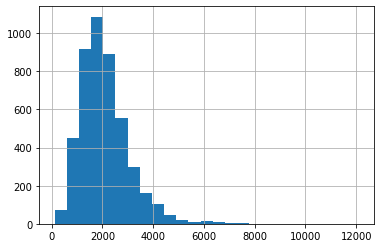

In [5]:
df.DR1TKCAL.hist(bins=25)

The graph is skewed to the right

<AxesSubplot:xlabel='DR1TKCAL', ylabel='LBXTC'>

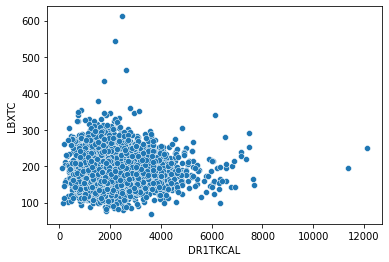

In [6]:
sns.scatterplot(x='DR1TKCAL',y='LBXTC',data=df)

As the daily amount of calories increase, the total cholesterol seems to increase

## Protein

<AxesSubplot:>

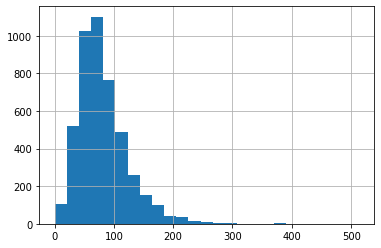

In [7]:
df.DR1TPROT.hist(bins=25)

The amount of protein in the diet is also right skewed. 

<AxesSubplot:xlabel='DR1TPROT', ylabel='LBXTC'>

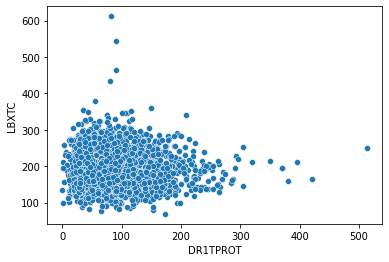

In [8]:
sns.scatterplot(x='DR1TPROT',y='LBXTC',data=df)

Again as the protein increases there is an increase in total cholesterol

## Carbohydrates

<AxesSubplot:>

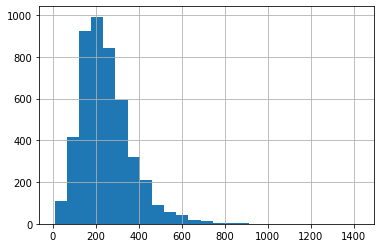

In [9]:
df.DR1TCARB.hist(bins=25)

<AxesSubplot:xlabel='DR1TCARB', ylabel='LBXTC'>

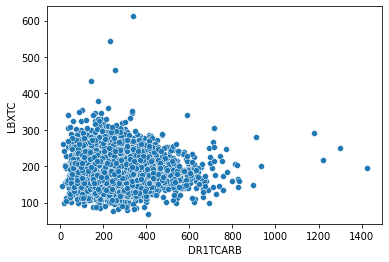

In [10]:
sns.scatterplot(x='DR1TCARB',y='LBXTC',data=df)

Again the distribution is right skewed and as the amount of carbohydrates increases, the total cholesterol seems to increase.

## Sugar

<AxesSubplot:>

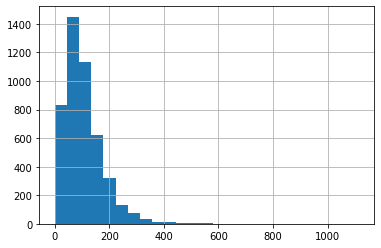

In [11]:
df.DR1TSUGR.hist(bins=25)

<AxesSubplot:xlabel='DR1TSUGR', ylabel='LBXTC'>

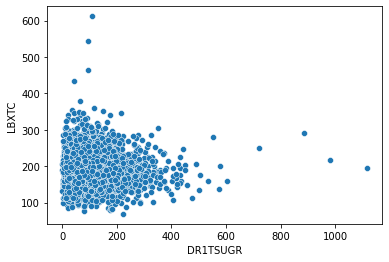

In [12]:
sns.scatterplot(x='DR1TSUGR',y='LBXTC',data=df)

## Dietary Fiber

<AxesSubplot:>

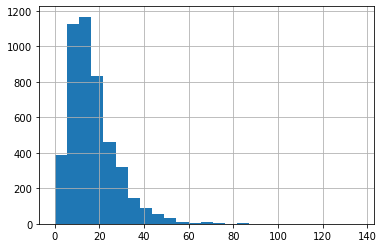

In [16]:
df.DR1TFIBE.hist(bins=25)

<AxesSubplot:xlabel='DR1TFIBE', ylabel='LBXTC'>

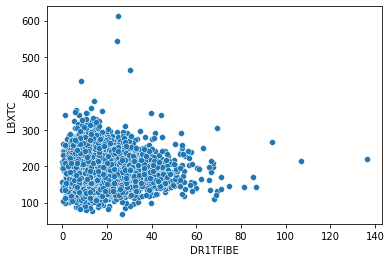

In [17]:
sns.scatterplot(x='DR1TFIBE',y='LBXTC',data=df)

## Total Fat

<AxesSubplot:>

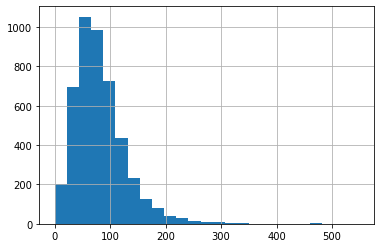

In [19]:
df.DR1TTFAT.hist(bins=25)

<AxesSubplot:xlabel='DR1TTFAT', ylabel='LBXTC'>

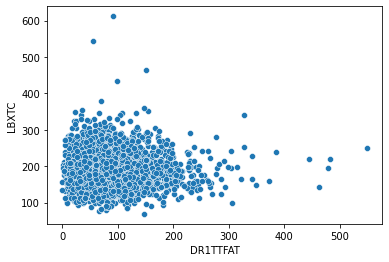

In [20]:
sns.scatterplot(x='DR1TTFAT',y='LBXTC',data=df)

## Saturated Fat

<AxesSubplot:>

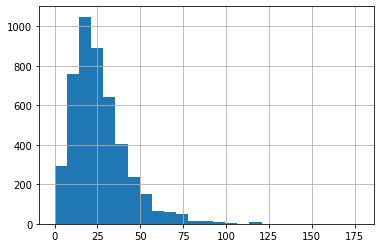

In [23]:
df.DR1TSFAT.hist(bins=25)

<AxesSubplot:xlabel='DR1TSFAT', ylabel='LBXTC'>

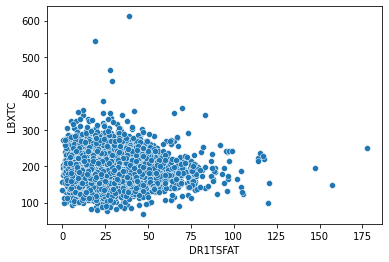

In [24]:
sns.scatterplot(x='DR1TSFAT',y='LBXTC',data=df)

## Monounsaturated fats

<AxesSubplot:>

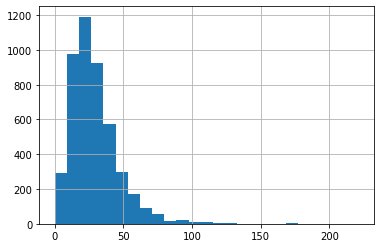

In [26]:
df.DR1TMFAT.hist(bins=25)

<AxesSubplot:xlabel='DR1TMFAT', ylabel='LBXTC'>

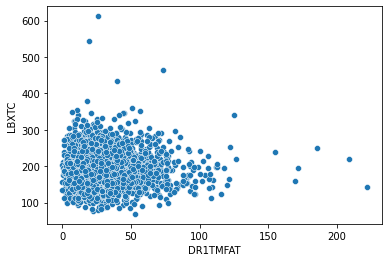

In [27]:
sns.scatterplot(x='DR1TMFAT',y='LBXTC',data=df)

## Polyunsaturated fats

<AxesSubplot:>

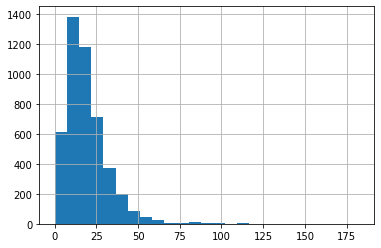

In [28]:
df.DR1TPFAT.hist(bins=25)

<AxesSubplot:xlabel='DR1TPFAT', ylabel='LBXTC'>

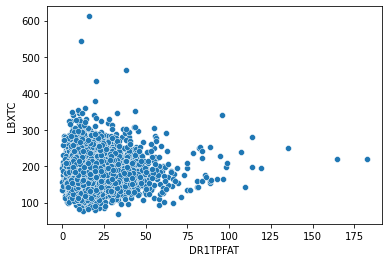

In [29]:
sns.scatterplot(x='DR1TPFAT',y='LBXTC',data=df)

## Cholesterol

<AxesSubplot:>

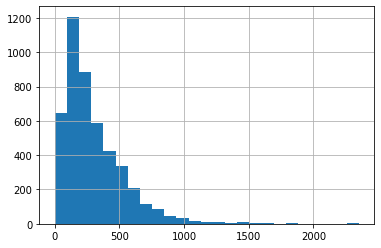

In [30]:
df.DR1TCHOL.hist(bins=25)

<AxesSubplot:xlabel='DR1TCHOL', ylabel='LBXTC'>

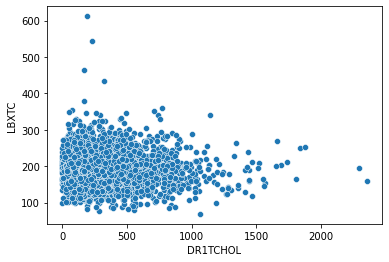

In [31]:
sns.scatterplot(x='DR1TCHOL',y='LBXTC',data=df)

## Sodium

<AxesSubplot:>

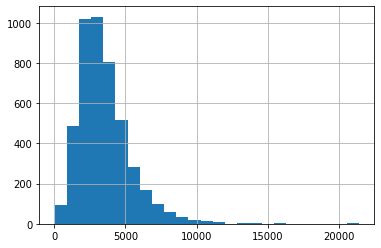

In [32]:
df.DR1TSODI.hist(bins=25)

<AxesSubplot:xlabel='DR1TSODI', ylabel='LBXTC'>

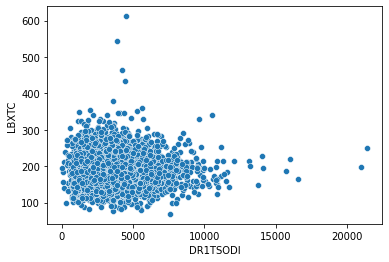

In [33]:
sns.scatterplot(x='DR1TSODI',y='LBXTC',data=df)

## Vitamin D

<AxesSubplot:>

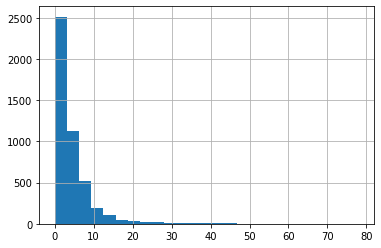

In [34]:
df.DR1TVD.hist(bins=25)

<AxesSubplot:xlabel='DR1TVD', ylabel='LBXTC'>

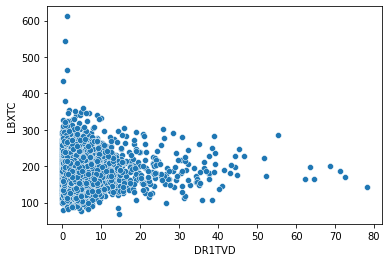

In [35]:
sns.scatterplot(x='DR1TVD',y='LBXTC',data=df)

## Calcium

<AxesSubplot:>

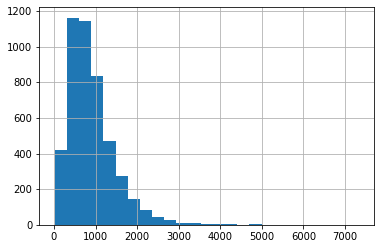

In [36]:
df.DR1TCALC.hist(bins=25)

<AxesSubplot:xlabel='DR1TCALC', ylabel='LBXTC'>

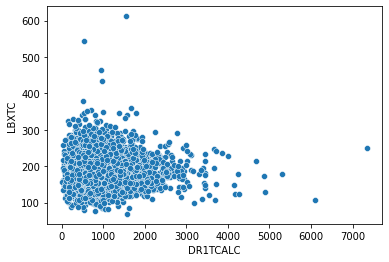

In [37]:
sns.scatterplot(x='DR1TCALC',y='LBXTC',data=df)

## Iron